# Regression Analysis

### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating Path
path = r'C:\Users\mojis\Documents\11-2022-Gun violence Analysis'

In [4]:
# Importing data as df
df = pd.read_pickle (os.path.join(path, '02-Data', 'Prepared data','gun_violence_updated_clean.pkl'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'latitude', 'longitude', 'n_guns_involved', 'year',
       'month', 'monthday', 'weekday', 'n_shot', 'shot Category',
       'weekday_names'],
      dtype='object')

In [6]:
df.head()

incident_id       date           state city_or_county  n_killed  n_injured  \
0      461105 2013-01-01    Pennsylvania     Mckeesport         0          4   
1      460726 2013-01-01      California      Hawthorne         1          3   
2      478855 2013-01-01            Ohio         Lorain         1          3   
3      478925 2013-01-05        Colorado         Aurora         4          0   
4      478959 2013-01-07  North Carolina     Greensboro         2          2   

   latitude  longitude  n_guns_involved  year  month  monthday  weekday  \
0   40.3467   -79.8559              NaN  2013      1         1        1   
1   33.9090  -118.3330              NaN  2013      1         1        1   
2   41.4455   -82.1377              2.0  2013      1         1        1   
3   39.6518  -104.8020              NaN  2013      1         5        5   
4   36.1140   -79.9569              2.0  2013      1         7        0   

   n_shot  shot Category weekday_names  
0       4  Moderate Loss       Mondays  
1       4  Moderate Loss       Mondays  
2       4  Moderate Loss       Mondays  
3       4  Moderate Loss       Fridays  
4       4  Moderate Loss       Sundays

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   incident_id      239677 non-null  object        
 1   date             239677 non-null  datetime64[ns]
 2   state            239677 non-null  object        
 3   city_or_county   239677 non-null  object        
 4   n_killed         239677 non-null  int64         
 5   n_injured        239677 non-null  int64         
 6   latitude         231754 non-null  float64       
 7   longitude        231754 non-null  float64       
 8   n_guns_involved  140226 non-null  float64       
 9   year             239677 non-null  int64         
 10  month            239677 non-null  int64         
 11  monthday         239677 non-null  int64         
 12  weekday          239677 non-null  int64         
 13  n_shot           239677 non-null  int64         
 14  shot Category    239

In [8]:
df.shape

(239677, 16)

##### Missing value

In [9]:
df.isnull().sum()

incident_id            0
date                   0
state                  0
city_or_county         0
n_killed               0
n_injured              0
latitude            7923
longitude           7923
n_guns_involved    99451
year                   0
month                  0
monthday               0
weekday                0
n_shot                 0
shot Category          0
weekday_names          0
dtype: int64

In [10]:
# Impute missing values with median

df['n_guns_involved'].fillna(df['n_guns_involved'].median(), inplace=True)

In [11]:
# creating subset to exclude longitude and latitude column
df2= df[['incident_id', 'date', 'state', 'city_or_county','n_killed','n_injured',
           'n_guns_involved','year',
       'month', 'monthday', 'weekday', 'n_shot', 'shot Category',
       'weekday_names']]

In [12]:
df2.isnull().sum()

incident_id        0
date               0
state              0
city_or_county     0
n_killed           0
n_injured          0
n_guns_involved    0
year               0
month              0
monthday           0
weekday            0
n_shot             0
shot Category      0
weekday_names      0
dtype: int64

##### Duplicate check

In [13]:
dups= df2.duplicated()

In [14]:
dups.shape # no duplicates

(239677,)

##### Extreme value check

C:\Users\mojis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_shot', ylabel='Density'>

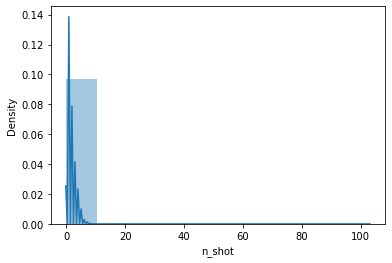

In [15]:
sns.distplot(df2['n_shot'],bins =10, kde = True)

In [16]:
df2['n_shot'].mean() # Check the mean

0.7462960567764116

In [17]:
df2['n_shot'].median() # Check the median

1.0

In [18]:
df2['n_shot'].min() # Check the minimum

0

In [19]:
df2['n_shot'].max() # Check the maximum

103

In [20]:
df2.describe()

n_killed      n_injured  n_guns_involved           year  \
count  239677.000000  239677.000000    239677.000000  239677.000000   
mean        0.252290       0.494007         1.217902    2015.711629   
std         0.521779       0.729952         3.583024       1.225870   
min         0.000000       0.000000         1.000000    2013.000000   
25%         0.000000       0.000000         1.000000    2015.000000   
50%         0.000000       0.000000         1.000000    2016.000000   
75%         0.000000       1.000000         1.000000    2017.000000   
max        50.000000      53.000000       400.000000    2018.000000   

               month       monthday        weekday         n_shot  
count  239677.000000  239677.000000  239677.000000  239677.000000  
mean        6.351786      15.773787       3.058842       0.746296  
std         3.447656       8.831929       2.023114       0.842343  
min         1.000000       1.000000       0.000000       0.000000  
25%         3.000000       8.000000       1.000000       0.000000  
50%         6.000000      16.000000       3.000000       1.000000  
75%         9.000000      23.000000       5.000000       1.000000  
max        12.000000      31.000000       6.000000     103.000000

### 3. Data prep for regression analysis

#### Hypothesis 1: If there's more gun involve, then there will be increase in the number of people shot. 

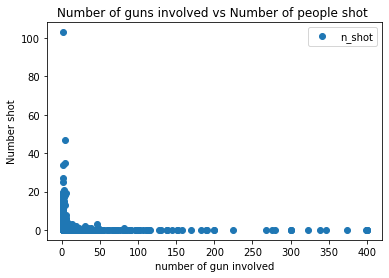

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'n_guns_involved', y='n_shot',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of guns involved vs Number of people shot ')  
plt.xlabel('number of gun involved')  
plt.ylabel('Number shot')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['n_guns_involved'].values.reshape(-1,1)
y = df2['n_shot'].values.reshape(-1,1)

In [23]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [24]:
y

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

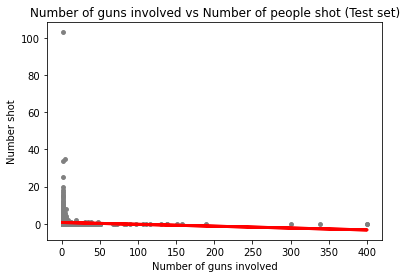

In [29]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of guns involved vs Number of people shot (Test set)')
plot_test.xlabel('Number of guns involved')
plot_test.ylabel('Number shot')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
#Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01002221]]
Mean squared error:  0.83446715232307
R2 score:  0.0013920200117359949


In [32]:
y_predicted

array([[0.7478486],
       [0.7478486],
       [0.7478486],
       ...,
       [0.7478486],
       [0.7478486],
       [0.7478486]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        1   0.747849
1        5   0.747849
2        1   0.747849
3        1   0.747849
4        0   0.747849
5        0   0.747849
6        1   0.747849
7        1   0.747849
8        0   0.747849
9        1   0.747849
10       0   0.747849
11       1   0.747849
12       0   0.747849
13       0   0.747849
14       0   0.747849
15       0   0.747849
16       1   0.747849
17       4   0.747849
18       0   0.747849
19       0   0.747849
20       0   0.747849
21       0   0.747849
22       1   0.747849
23       1   0.747849
24       0   0.747849
25       1   0.747849
26       0   0.747849
27       0   0.747849
28       2   0.747849
29       1   0.747849

#### Interpretation

The slope is negative, so we have a very weak negative relationship 0f -0.01. This does not aligns with my hypothesis . The MSE is 0.83 which is not too high based on this data we are analysing, as the regression line represent quite a reasonable number of the data but there are some away from the line. Also, the R2 score of 0.001 represents a very poor fit. This model is inaccurate which can also be seen by the variance in the actual vs prdicted values




##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01002221]]
Mean squared error:  0.6541987384362361
R2 score:  0.0019797957012790413


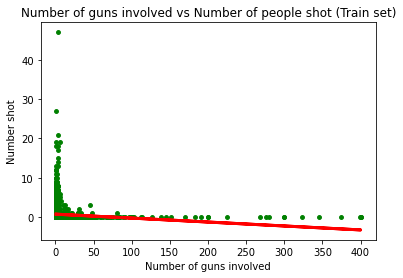

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of guns involved vs Number of people shot (Train set)')
plot_test.xlabel('Number of guns involved')
plot_test.ylabel('Number shot')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE is a little lower on the train set compared to the test set. Confirming that this is not a good model to use. This proves that the number of gun involved in any gun violence incident does not really influence the number of people that would be shot.



### Bonus: Regression on df2 of n_shot(>=1 and above)

In [38]:
df_test = df2[df2['n_shot'] >=1] 

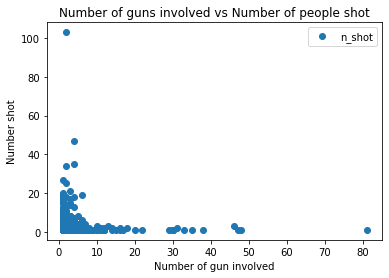

In [39]:
# See how the scatterplot looks without 0 number shot.

df_test.plot(x = 'n_guns_involved', y='n_shot', style='o')  
plt.title('Number of guns involved vs Number of people shot')  
plt.xlabel('Number of gun involved')  
plt.ylabel('Number shot')  
plt.show()

In [40]:
# Reshape again

X_2 = df_test['n_guns_involved'].values.reshape(-1,1)
y_2 = df_test['n_shot'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06369148]]
Mean squared error:  0.47352727846477705
R2 score:  0.003065369014673913


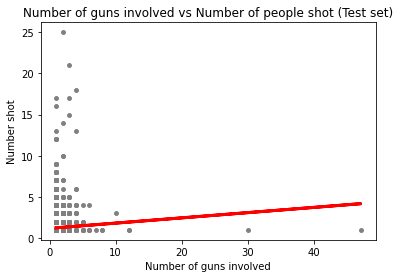

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of guns involved vs Number of people shot (Test set)')
plot_test.xlabel('Number of guns involved')
plot_test.ylabel('Number shot')
plot_test.show()

In [47]:
data2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data2.head(30)

Actual  Predicted
0        1   1.253677
1        1   1.253677
2        1   1.253677
3        1   1.253677
4        1   1.253677
5        1   1.253677
6        1   1.253677
7        1   1.253677
8        2   1.253677
9        1   1.253677
10       1   1.253677
11       1   1.253677
12       1   1.253677
13       1   1.253677
14       1   1.253677
15       2   1.253677
16       1   1.253677
17       2   1.253677
18       1   1.253677
19       1   1.253677
20       1   1.253677
21       1   1.253677
22       1   1.253677
23       1   1.253677
24       2   1.253677
25       1   1.253677
26       1   1.317368
27       1   1.253677
28       3   1.253677
29       1   1.253677

When looking at number shot in this data excluding 0 shot in the U.S gun violence incident, the slope is became positive 0.06 (very weak positive realationship). The MSE has come down in comparison to running on the entire df2 and the R2 score has increased to 0.003 compared to running the entire df2. The model is not a good fit

In [48]:
# export df2 as gun_violence_clean_updated2.pkl
df2.to_pickle(os.path.join(path,'02-Data','Prepared data','gun_violence_clean_updated2.pkl'))

In [49]:
# export df2 as gun_violence_clean_updated3.csv
df2.to_csv(os.path.join(path,'02-Data','Prepared data','gun_violence_clean_updated3.csv'))

#### Hypothesis 2: If more people are shot in a gun violence, there is a probability of them getting killed or injured.



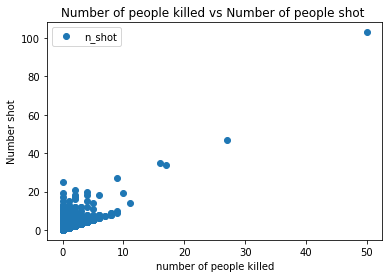

In [50]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'n_killed', y='n_shot',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of people killed vs Number of people shot ')  
plt.xlabel('number of people killed')  
plt.ylabel('Number shot')  
plt.show()

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = df2['n_killed'].values.reshape(-1,1)
y_3= df2['n_shot'].values.reshape(-1,1)

In [52]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [53]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [54]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [55]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.76861056]]
Mean squared error:  0.5782445419147828
R2 score:  0.3080139675561484


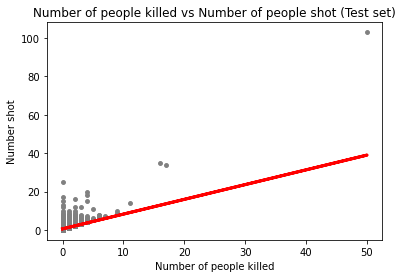

In [57]:
# Visualizing the test set results.
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Number of people killed vs Number of people shot (Test set)')
plot_test.xlabel('Number of people killed')
plot_test.ylabel('Number shot')
plot_test.show()

In [58]:
data3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data3.head(30)

Actual  Predicted
0        1   0.552702
1        5   3.627144
2        1   0.552702
3        1   0.552702
4        0   0.552702
5        0   0.552702
6        1   0.552702
7        1   1.321313
8        0   0.552702
9        1   0.552702
10       0   0.552702
11       1   1.321313
12       0   0.552702
13       0   0.552702
14       0   0.552702
15       0   0.552702
16       1   0.552702
17       4   1.321313
18       0   0.552702
19       0   0.552702
20       0   0.552702
21       0   0.552702
22       1   1.321313
23       1   0.552702
24       0   0.552702
25       1   0.552702
26       0   0.552702
27       0   0.552702
28       2   2.089923
29       1   0.552702

The slope is positive 0.76, so there is a strong positive relationship and this aligns with my hypothesis . The MSE is 0.57 which is not high based on this data we are analysing, The regression line is a represention a some of the data as not all data are closer to the line. As for the R2, the score of 0.30 indicate a poor fit.This mean this model isn’t doing a great job of explaining the relationship between the “Number killed” and “Number shot” variables. The relationship simply doesn’t follow a single, straight regression line.

#### n_shot and n_injured plot

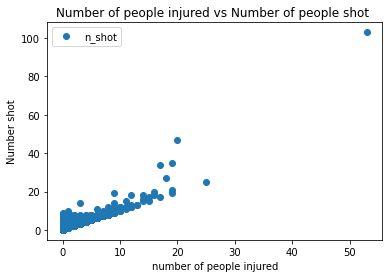

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'n_injured', y='n_shot',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of people injured vs Number of people shot ')  
plt.xlabel('number of people injured')  
plt.ylabel('Number shot')  
plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_4 = df2['n_injured'].values.reshape(-1,1)
y_4= df2['n_shot'].values.reshape(-1,1)

In [61]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [62]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [63]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [64]:
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

In [65]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88404907]]
Mean squared error:  0.30679107597851396
R2 score:  0.6328627006965533


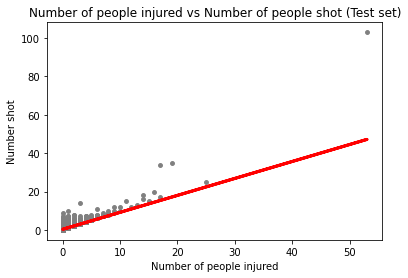

In [66]:
# Visualizing the test set results.
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test.title('Number of people injured vs Number of people shot (Test set)')
plot_test.xlabel('Number of people injured')
plot_test.ylabel('Number shot')
plot_test.show()

In [67]:
data4 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data4.head(30)

Actual  Predicted
0        1   1.192413
1        5   1.192413
2        1   1.192413
3        1   1.192413
4        0   0.308364
5        0   0.308364
6        1   1.192413
7        1   0.308364
8        0   0.308364
9        1   1.192413
10       0   0.308364
11       1   0.308364
12       0   0.308364
13       0   0.308364
14       0   0.308364
15       0   0.308364
16       1   1.192413
17       4   2.960511
18       0   0.308364
19       0   0.308364
20       0   0.308364
21       0   0.308364
22       1   0.308364
23       1   1.192413
24       0   0.308364
25       1   1.192413
26       0   0.308364
27       0   0.308364
28       2   0.308364
29       1   1.192413

The slope is positive 0.88, so there is a strong positive relationship and this aligns with my hypothesis . The MSE is 0.30 which is good based on this data we are analysing, The regression line is a represention of the data most data are closer to the line. As for the R2, the score of 0.63 indicate a good fit as it is closer to 1.This mean this model is doing a great job of explaining the relationship between the “Number injured” and “Number shot” variables. The relationship follow a single, straight regression line with one outlier which is not suprising as there are few incident where we have high number of people injured.